# MOWNIT - LAB 2 - Rozwiązywanie układów równań liniowych

### część 1 - Metoda Gaussa-Jordana

In [1]:
import random
import time
import numpy as np
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def normalizing(matrix):
    n = len(matrix)
    for i in range(n):
        max_var = max(matrix[i][:-1])
        if max_var < abs(min(matrix[i][:-1])):
            max_var = min(matrix[i][:-1])
        matrix[i] = [matrix[i][x]/max_var for x in range(n+1)]
    return matrix

In [3]:
#Zwraca indeks wartosci najwiekszej w kolumnie

def partial_pivoting(ind_c, matrix, changed) -> int:
    n = len(matrix)
    index_biggest = ind_c
    for i in range(1+ind_c,n):
        if abs(matrix[changed[i]][ind_c]) > abs(matrix[changed[index_biggest]][ind_c]):
            index_biggest = i
    return index_biggest


In [4]:
def count_with_pivoting(matrix):
    matrix = normalizing(matrix)
    n = len(matrix)
    
    pivoting = [i for i in range(n)]
    
    #zerowanie dolnego trójkąta
    for col in range(n):
        
        #partial-pivoting w miejscu
        to_change = partial_pivoting(col, matrix, pivoting)
        pivoting[to_change], pivoting[col] = pivoting[col], pivoting[to_change]

        for i in range(col+1,n):
            multiplier = -matrix[pivoting[i]][col]/matrix[pivoting[col]][col]

            for new_col in range(0, len(matrix[i])):
                if new_col > col:
                    matrix[pivoting[i]][new_col] += (matrix[pivoting[col]][new_col]*multiplier)



    #zerowanie gornego trójkata
    for col in range(n-1, 0,-1):

        for i in range(0,col):
            multiplier = -matrix[pivoting[i]][col]/matrix[pivoting[col]][col]
            matrix[pivoting[i]][-1] += matrix[pivoting[col]][-1]*multiplier
        
    return [matrix[pivoting[i]][-1]/matrix[pivoting[i]][i] for i in range(len(matrix))]
                


In [5]:
def count_with_pivoting_not_inplace(matrix, fullpivoting=False):
    matrix = normalizing(matrix)
    n = len(matrix)
    
    pivoting = [i for i in range(n)]
    
    #zerowanie dolnego trójkąta
    for col in range(n):
        
        #partial-pivoting w miejscu
        to_change = partial_pivoting(col, matrix, pivoting)
        matrix[col], matrix[to_change] = matrix[to_change], matrix[col]

        for i in range(col+1,n):
            multiplier = -matrix[i][col]/matrix[col][col]

            for new_col in range(0, len(matrix[i])):
                if new_col > col:
                    matrix[i][new_col] += (matrix[col][new_col]*multiplier)


    #zerowanie gornego trójkata
    for col in range(n-1, 0,-1):
        
        for i in range(0,col):
            multiplier = -matrix[i][col]/matrix[col][col]
            matrix[i][-1] += matrix[col][-1]*multiplier
        
    matrix = normalizing(matrix)
    return [matrix[i][-1]/matrix[i][i] for i in range(len(matrix))]
                


In [6]:
def count_without_pivoting(matrix):
    matrix = normalizing(matrix)
    n = len(matrix)
    
    #zerowanie dolnego trójkąta
    for col in range(n):

        for i in range(col+1,n):
            multiplier = -matrix[i][col]/matrix[col][col]

            for new_col in range(0, len(matrix[i])):
                if new_col > col:
                    matrix[i][new_col] += (matrix[col][new_col]*multiplier)


    #zerowanie gornego trójkata
    for col in range(n-1, 0,-1):
        
        for i in range(0,col):
            multiplier = -matrix[i][col]/matrix[col][col]
            matrix[i][-1] += matrix[col][-1]*multiplier
        
    matrix = normalizing(matrix)
    return [matrix[i][-1]/matrix[i][i] for i in range(len(matrix))]
                


In [7]:
# Generowanie testów
def test_matrix_int(n, eguation=True):
    if eguation:
        plus = 1
    else:
        plus = 0
    return [[random.randint(1,100) for _ in range(n+plus)] for _ in range(n)]


random.seed(10)
n = [random.randint(500,600) for _ in range(10)]
testing_matrixs = [test_matrix_int(i) for i in n]

In [8]:
#Testing
def are_the_same(a1, a2, after_comma=5):
    if len(a1) != len(a2):
        return False
    for i in range(len(a1)):
        if round(a1[i],after_comma) != round(a2[i],after_comma):
            return False
    return True

index = 0
for m in testing_matrixs:
    index += 1
    A = [[m[i][j] for j in range(len(m))] for i in range(len(m))]
    B = [m[i][-1] for i in range(len(m))]
    m1 = [[m[i][j] for j in range(len(m[0]))] for i in range(len(m))]
    m2 = [[m[i][j] for j in range(len(m[0]))] for i in range(len(m))]
    m3 = [[m[i][j] for j in range(len(m[0]))] for i in range(len(m))]
    
    t1_lib = time.time()
    library_result = np.linalg.solve(np.array(A), np.array(B))
    t_lib = np.round(time.time() - t1_lib, 3)

    t1_my = time.time()
    a = count_with_pivoting(m1)
    t_my = np.round(time.time() - t1_my, 3)

    my_result = np.array(a)

    t1_my_w = time.time()
    a = count_without_pivoting(m2)
    t_my_w = np.round(time.time() - t1_my_w, 3)

    t1_my_wp = time.time()
    a = count_with_pivoting_not_inplace(m3)
    t_my_wp = np.round(time.time() - t1_my_wp, 3)
    
    print(f"Test {index}: {are_the_same(library_result,my_result)}  wielkość: {len(m)} \n czas biblioteczny: {t_lib} \n czas mój z pivotingiem w miejscu: {t_my} \n czas mój z pivotingiem: {t_my_wp} \n czas mój bez pivotingu: {t_my_w} \n")

Test 1: True  wielkość: 573 
 czas biblioteczny: 0.033 
 czas mój z pivotingiem w miejscu: 9.209 
 czas mój z pivotingiem: 8.328 
 czas mój bez pivotingu: 7.711 

Test 2: True  wielkość: 504 
 czas biblioteczny: 0.021 
 czas mój z pivotingiem w miejscu: 6.02 
 czas mój z pivotingiem: 5.253 
 czas mój bez pivotingu: 5.763 

Test 3: True  wielkość: 554 
 czas biblioteczny: 0.022 
 czas mój z pivotingiem w miejscu: 8.056 
 czas mój z pivotingiem: 6.532 
 czas mój bez pivotingu: 7.761 

Test 4: True  wielkość: 561 
 czas biblioteczny: 0.058 
 czas mój z pivotingiem w miejscu: 9.234 
 czas mój z pivotingiem: 7.159 
 czas mój bez pivotingu: 7.464 

Test 5: True  wielkość: 573 
 czas biblioteczny: 0.024 
 czas mój z pivotingiem w miejscu: 9.229 
 czas mój z pivotingiem: 6.926 
 czas mój bez pivotingu: 8.093 

Test 6: True  wielkość: 501 
 czas biblioteczny: 0.019 
 czas mój z pivotingiem w miejscu: 5.49 
 czas mój z pivotingiem: 4.933 
 czas mój bez pivotingu: 4.658 

Test 7: True  wielkość: 

#### Wnioski

Z testów, wynika ze zaden algorytm zaimplementowany przeze mnie nie jest znaczaco szybszy od innych. W róznych testach najszybszy ( z moich implementacji) okazal sie inny sposob. Moze to wynikac z dosc topornej ( uzywajacej listy) implementacji metody pivotingu w miejscu ( bez zamieniania wierszy w naszej macierzy).
Wszystkie moje algorytmy bazuja na metodzie Gaussa-Jordana.

Funckja biblioteczna jest znaczaco szybsza od wszystkich zaimplementowanych przeze mnie metod.

### Część 2 - Faktoryzacjza LU

In [9]:
def create_u_and_L(matrix):
    # matrix = normalizing(matrix)
    n = len(matrix)
    
    #zerowanie dolnego trójkąta
    for col in range(n):

        for i in range(col+1,n):
            multiplier = -matrix[i][col]/matrix[col][col]
            matrix[i][col] = - multiplier
            for new_col in range(0, n):

                if new_col > col:
                    matrix[i][new_col] += (matrix[col][new_col]*multiplier) 
        
    return matrix

In [10]:
def check_factorization(A,LU):
    n = len(A)
    # || A - LU || = 0

    #mnozenie L i U
    new = [[0 for _ in range(len(A))] for _ in range(n)]
    for i in range(n):

        for j in range(n):

            for k in range(n):
                var = 1
                if i == k:
                    var *= 1
                elif i > k:
                    var *= LU[i][k]
                else:
                    var *= 0
                if k <= j:
                    var *= LU[k][j]
                else:
                    var *= 0
                new[i][j] += var

    #odejmowanie
    A_N = np.array(A).reshape(n,n)
    LU_N = np.array(new).reshape(n,n)
    substract = A_N - LU_N

    return np.linalg.det(substract)

In [11]:
#Testy
tests = [test_matrix_int(500, True) for _ in range(10)]

index = 0
for m in tests:
    copy = [[m[i][j] for j in range(len(m))] for i in range(len(m))]
    index += 1
    
    tr = time.time()
    result = create_u_and_L(m)
    timet = np.round(time.time() - tr, 3)
    print(f"Test {index} czas: {timet} błąd: {check_factorization(copy, result)}")

Test 1 czas: 4.431 błąd: 0.0
Test 2 czas: 4.295 błąd: 0.0
Test 3 czas: 4.275 błąd: 0.0
Test 4 czas: 4.312 błąd: 0.0
Test 5 czas: 4.3 błąd: 0.0
Test 6 czas: 4.939 błąd: 0.0
Test 7 czas: 5.353 błąd: 0.0
Test 8 czas: 4.266 błąd: 0.0
Test 9 czas: 4.6 błąd: 0.0
Test 10 czas: 4.625 błąd: 0.0


### Wnioski

Moja implementacjaMetoda LU, w miare szybko znajduje macierze LU, nie popełniając przy tym znaczących błędów. 


## Część 3 - Analiza obwodu elektrycznego

### **1. Wczytywanie z pliku**

Wczytujemy plik z katalogu testy_lab2

##### Przykład pliku:

10 - ilość wierzchołków grafu

0 1 10 - opór miedzy wierzchołkiem 0 i 1 wynosi 10

1 2 5

0 2 3

0 5 11

3 4 12

0 3 10

2 4 2

In [12]:
def read_from_file(name):
    file = open(f"testy_lab2/{name}", "r")
    lines = file.readlines()
    n = int(lines[0][:-1])
    graph = [[] for _ in range(n)]
    edges = []
    dic = {}
    resistances = []

    index = 0

    for line in lines[1:]:

        if line[-1] == "\n":
            line = line[:-1]

        line = line.split(" ")
        v1, v2, R = map(int,line)
        
        if v1 > v2:
            v1, v2 = v2, v1

        resistances.append(R)

        graph[v1].append((v2, R, -1, index)) # wierzchołek, opór, przepływ prądu ( 1 wplywa, -1 wyplywa)
        graph[v2].append((v1, R, 1, index))
        edges.append([v1, v2])
        dic[(v1,v2)] = [index, R]
        index += 1

    return graph, edges, index, dic, resistances
    

### **2. Wizualizacja grafów**

In [13]:
def visualize_graph(n, edges, resistances=None, s=-1, t=-1):
    vertexes = ["black" if i not in [s,t] else "red" for i in range(n)]
    g = ig.Graph(n = n, edges = edges)
    layout = g.layout("kk")
    fig, ax = plt.subplots()
    ig.plot(g, vertex_size=10, vertex_color = vertexes, target=ax, edge_label=resistances, layout = layout, edge_color="blue")

In [58]:
def edge_color(intensivity, max_intensivity):
    i = intensivity/(max_intensivity)

    color = (i,0.4, 0.8)
    return color

def direction_current(edges, intensity):
    for i in range(len(edges)):
        if intensity[i] < 0:
            edges[i][0], edges[i][1] = edges[i][1], edges[i][0]
    return edges

def visualize_with_intensity(n, edges, intensivity, resistances=None, s=-1, t=-1):
    vertexes = ["black" if i not in [s,t] else "red" for i in range(n)]
    edges = direction_current(edges, intensivity)
    g = ig.Graph(n=n, edges = edges, directed=True)
    layout = g.layout("kk")
    intensivity = list(map(abs, intensivity))
    
    colors = []
    for edge in intensivity:
        colors.append(edge_color(edge, max(intensivity)))
    fig, ax = plt.subplots()

    ig.plot(g, vertex_size=10,vertex_color=vertexes, layout=layout, target=ax, edge_color=colors, edge_arrow_size=4)


### **3. Przykładowe grafy**

In [15]:
seed = 20
global max_R
max_R = 30

In [37]:
def read_graph(n,nx_graph, rep=False):
    graph = [[] for _ in range(n)]
    edges = []
    dic = {}
    index = 0
    vertex = 0
    vertexes = {}
    resistances = []

    for line in nx.generate_edgelist(nx_graph, " " ):
        R = random.randint(1, max_R)
        if len(line.split(" ")) > 3:
            line = line[:-4].split(") (")
            v1 = line[0][1:].split(", ")
            v1 = (v1[0], v1[1])
            v2 = line[1].split(", ")
            v2 = (v2[0], v2[1])
            if vertexes.get(v1) == None:
                vertexes[v1] = vertex
                v1 = vertex
                vertex += 1
            else:
                v1 = vertexes.get(v1)
            if vertexes.get(v2) == None:
                vertexes[v2] = vertex
                v2 = vertex
                vertex += 1
            else:
                v2 = vertexes.get(v2)
        else:
            line = line.split(" ")[0:2]
            v1, v2 = map(int,line)

        
        if v1 >= v2:
            if rep:
                continue
            v1, v2 = v2, v1
        resistances.append(R)
        graph[v1].append((v2, R, -1, index)) # wierzchołek, opór, przepływ prądu ( 1 wplywa, -1 wyplywa)
        graph[v2].append((v1, R, 1, index))
        edges.append([v1, v2])
        dic[(v1,v2)] = [index, R]
        index += 1

    return graph, edges, index, dic, resistances

In [17]:
def Random_graph(v):
    g = nx.gnm_random_graph(v, 2*v)
    while not nx.is_connected(g):
        g = nx.gnm_random_graph(v, 2*v)
    return g

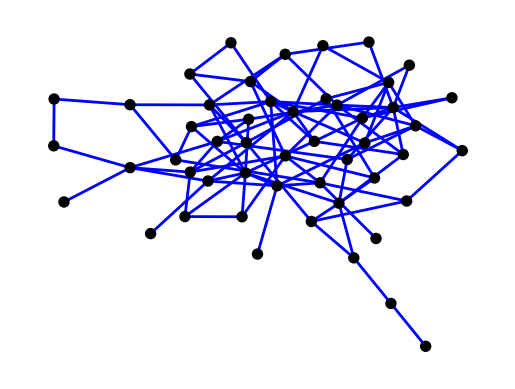

In [18]:
visualize_graph(50,read_graph(50,Random_graph(50))[1])

In [19]:
def regular_3_graph(v):
    g = nx.random_regular_graph(3,v,seed=20)
    return g

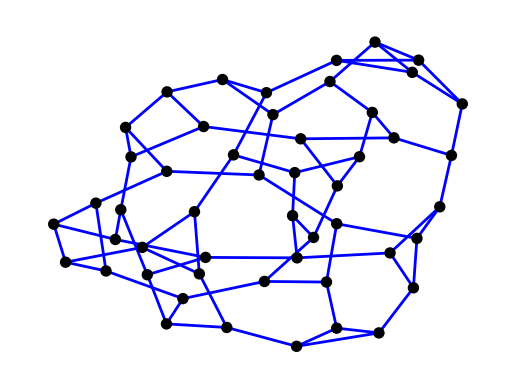

In [20]:
visualize_graph(50,read_graph(50,regular_3_graph(50))[1])

In [21]:
def windmill_graph(v, k):
    g = nx.windmill_graph(v, k)
    return g

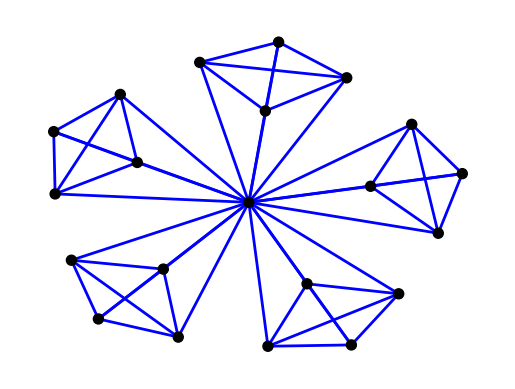

In [22]:
visualize_graph(21,read_graph(21,windmill_graph(5,5))[1])

In [23]:
def net_graph(v):
    g = nx.grid_2d_graph(v,v)
    return g

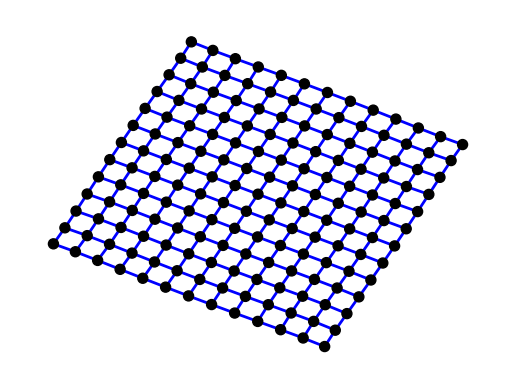

In [24]:
visualize_graph(169,read_graph(169,net_graph(13))[1])

In [25]:
def small_world_graph(v):
    g = nx.navigable_small_world_graph(v, 1, 1)
    return g

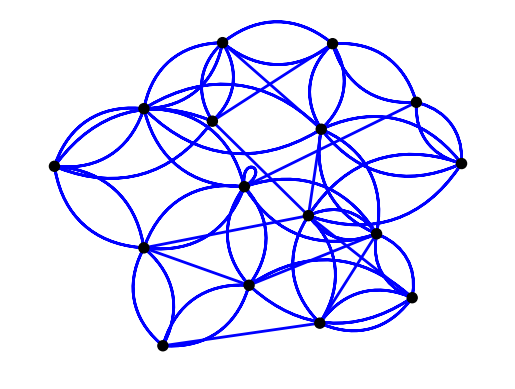

In [26]:
visualize_graph(8,read_graph(16,small_world_graph(4))[1])

### **4. Testy poprawności**

In [27]:
def Test(graph, intensivity, s, t,epsilon, complex_test = False):

    input = 0

    for i in graph[s]:
        input += abs(intensivity[i[-1]])

    for o in graph[t]:
        input -= abs(intensivity[o[-1]])

    if complex_test:   
        for v in range(len(graph)):
            if v in [s,t]:
                continue
            in_v = 0
            for next in graph[v]:
                index_next = next[-1]
                
                if (intensivity[index_next] > 0 and v > next[0]):
                    in_v += abs(intensivity[index_next])
                elif (intensivity[index_next] < 0 and v < next[0]):
                    in_v += abs(intensivity[index_next])
                else:
                    in_v -= abs(intensivity[index_next])
            if abs(in_v) > epsilon:
                return False

    return abs(input) < epsilon


### **5. Rozwiązania**

1. Metoda praw Kirchoffa

In [28]:
def kirchoff_1(m, n, graph, s, t):
    matrix = []
    for i in range(n):
        if i not in [s,t]:
            row = [0 for _ in range(m)]
            for _, _, direction, index  in graph[i]:
                row[index] = direction
            matrix.append(row)
    return matrix
    

In [29]:
def kirchoff_2(n, graph,s,t, dic):

    def find_all_paths(G, u, v):
    
        def DFS(u, v, visited, simplePaths=[], currentPath=[]):

            if visited[u]:
                return simplePaths

            visited[u] = True
            currentPath.append(u)

            if u == v:
                simplePaths.append(currentPath.copy())
            else:
                for next, _, _, _ in G[u]:
                    simplePaths = DFS(next, v, visited, simplePaths, currentPath)

            currentPath.pop()
            visited[u] = False
            return simplePaths

        visited = [False for _ in range(n)]
        return DFS(u,v,visited)

    paths = find_all_paths(graph, s, t)
    m = len(dic)
    matrix = []
    for path in paths:
        row = [0 for _ in range(m)]
        for i in range(1,len(path)):
            if path[i-1] < path[i]:
                key = (path[i-1], path[i])
                index, R = dic.get(key)
                row[index] = R
            else:
                key = (path[i],path[i-1])
                index, R = dic.get(key)
                row[index] = -R
        matrix.append(row)

    return matrix


In [30]:
def find_intensity_with_kirchoff(name, s, t, E, graph_vis=False, epsilon = 0.0001):
    # graph, edges, indexes, dic = read_from_file(name)
    graph, edges, indexes, dic, resistances = name
    n = len(graph)

    if graph_vis:
        visualize_graph(n, edges, resistances, s, t)

    matrix1 = kirchoff_1(indexes,n,graph,s,t)
    matrix2 = kirchoff_2(n,graph,s,t, dic)
    result = [0 for _ in range(len(matrix1))] + [E for _ in range(len(matrix2))]
    matrix = np.array(matrix1+matrix2)

    intensity = np.linalg.lstsq(matrix, np.array(result),rcond=None)[0]

    print(f"Test: {Test(graph, intensity, s, t, epsilon, False)} epsilon: {epsilon} complex_test: True")
    visualize_with_intensity(n, edges, intensity, s=s, t=t)

    

### **Testy duze**
Testy na grafach posiadajacych od 15 - 200 krawędzi

In [40]:
def find_intensity_with_kirchoff_test(name, s, t, E,i, epsilon = 0.0001):
    graph, edges, indexes, dic, resistances = name
    n = len(graph)
    matrix1 = kirchoff_1(indexes,n,graph,s,t)
    matrix2 = kirchoff_2(n,graph,s,t, dic)
    result = [0 for _ in range(len(matrix1))] + [E for _ in range(len(matrix2))]
    matrix = np.array(matrix1+matrix2)
    intensity = np.linalg.lstsq(matrix, np.array(result),rcond=None)[0]
    print(f"Test {i}: {Test(graph, intensity, s, t, epsilon, False)}")

In [46]:
r = read_graph(30,regular_3_graph(30))
find_intensity_with_kirchoff_test(r, 0,15,100,1)

Test 1: True


In [42]:
r = read_graph(191,windmill_graph(20,10))
find_intensity_with_kirchoff_test(r, 0,100,100,2)

Test 2: True


In [49]:
r = read_graph(36,net_graph(6))
find_intensity_with_kirchoff_test(r, 0,30,100,3)

KeyboardInterrupt: 

### **Testy wizualne - mniejsze**

Natezenie pradu w danej krawedzi pokazane jest przez ich kolory. Najwieksze natezenie maja krawedzie <span style="color:rgb(240,102,204)">rozowe</span>, srednie natezenie krawedzie <span style="color:rgb(120,102,204">fioletowe</span> i najmniejsze krawedzie <span style="color:rgb(20,102,204">niebieskie</span>.

Rózne grafy w róznych podpięciach

Test: True epsilon: 0.0001 complex_test: True
Test: True epsilon: 0.0001 complex_test: True


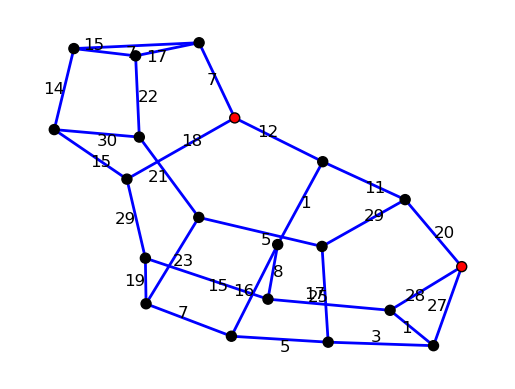

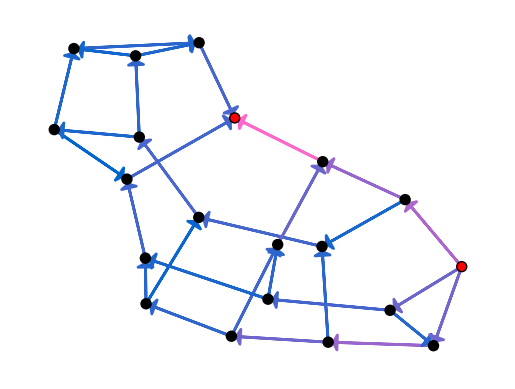

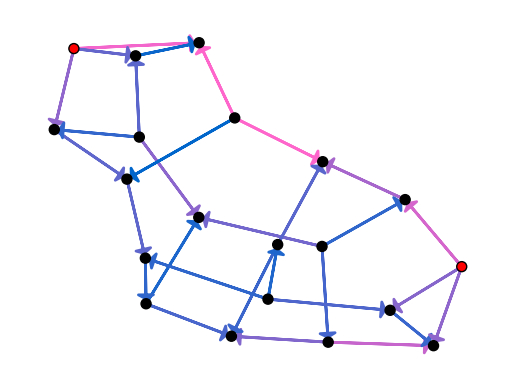

In [60]:
regular = read_graph(20,regular_3_graph(20))
find_intensity_with_kirchoff(regular, 0, 10, 100, True)
find_intensity_with_kirchoff(regular, 0, 7, 100)

Test: True epsilon: 0.0001 complex_test: True
Test: True epsilon: 0.0001 complex_test: True


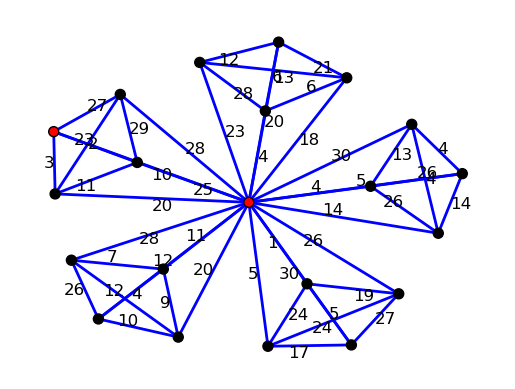

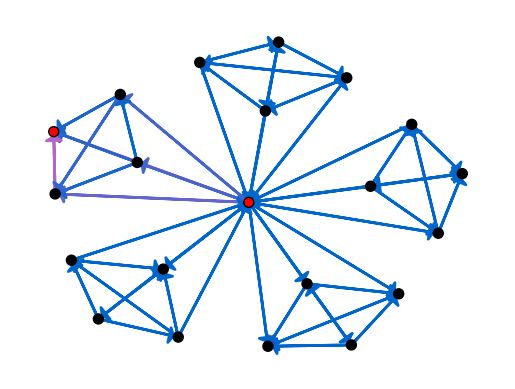

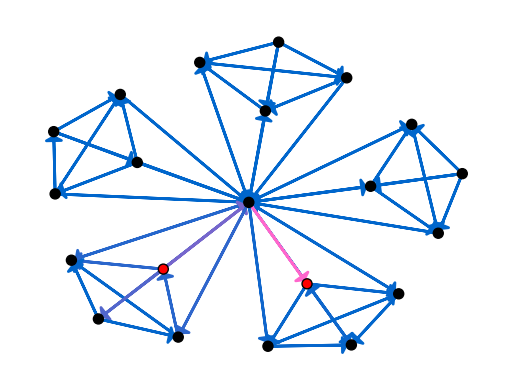

In [61]:
wind_mill = read_graph(21,windmill_graph(5,5))
find_intensity_with_kirchoff(wind_mill, 0, 9, 100, True)
find_intensity_with_kirchoff(wind_mill, 15, 20, 100)

Test: True epsilon: 0.0001 complex_test: True
Test: True epsilon: 0.0001 complex_test: True


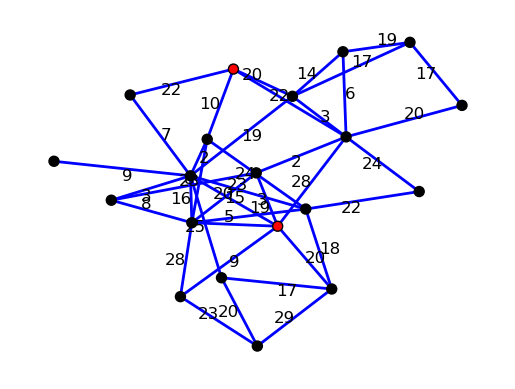

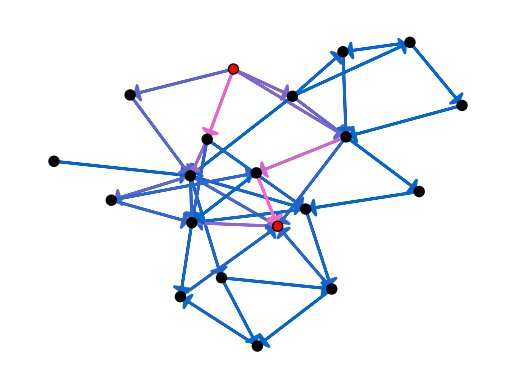

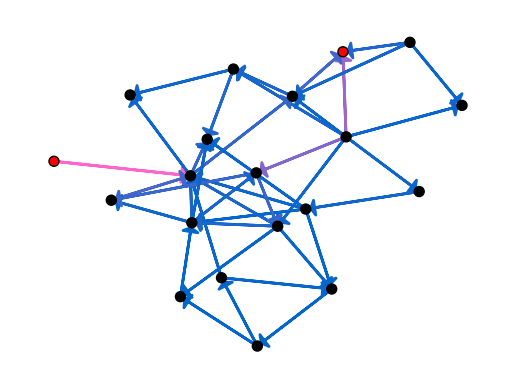

In [62]:
random_g = read_graph(20,Random_graph(20))
find_intensity_with_kirchoff(random_g, 0, 19, 100, True)
find_intensity_with_kirchoff(random_g, 5, 10, 100)

Test: True epsilon: 0.0001 complex_test: True
Test: True epsilon: 0.0001 complex_test: True


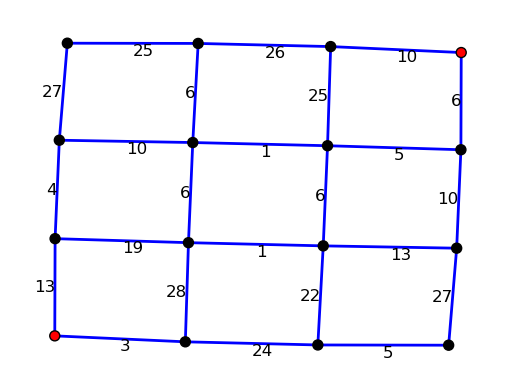

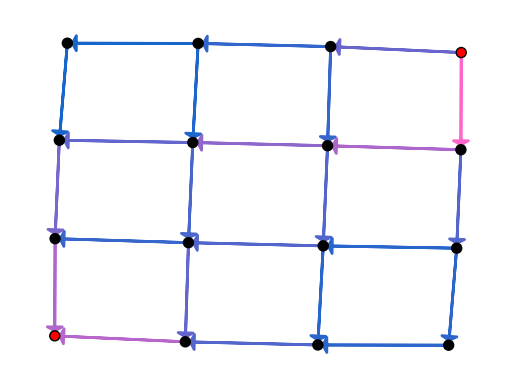

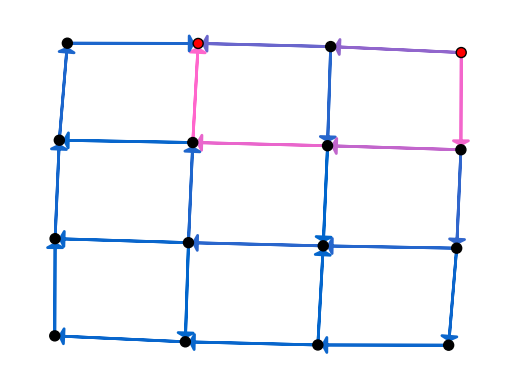

In [63]:
r = read_graph(16,net_graph(4))
find_intensity_with_kirchoff(r, 0, 15, 100, True)
find_intensity_with_kirchoff(r, 0, 4, 100)

Test: True epsilon: 0.0001 complex_test: True
Test: True epsilon: 0.0001 complex_test: True


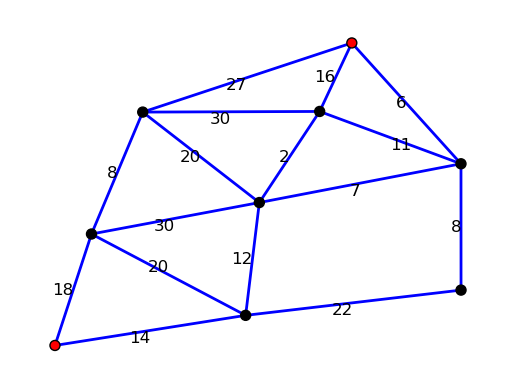

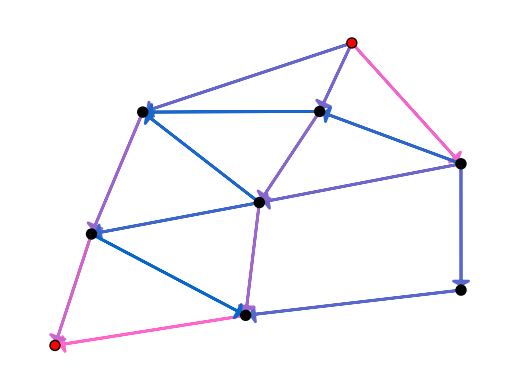

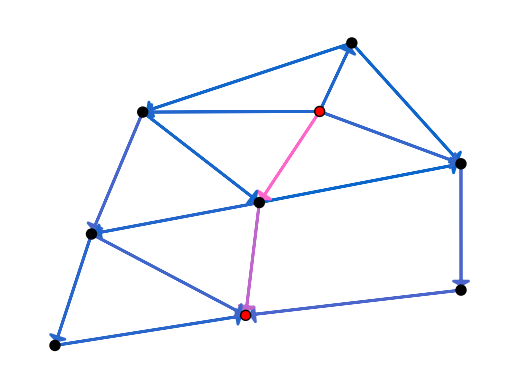

In [64]:
r = read_graph(9,small_world_graph(3),True)
find_intensity_with_kirchoff(r, 0, 8, 100, True)
find_intensity_with_kirchoff(r, 2, 7, 100)

### Wnioski i Komentarze

Korzystałam z pierwszego i drugiego prawa Kirchoffa.
W pierwszej częsci mojego programu, korzystałam z pierwszego prawa (suma natęzeń wpływającego prądu z węzła jest równa sumie natęzeń prądu wypływającego z tego wezła). Zgodnie z tą zasadą tworzyłam macierz która dla wszystkich wezłow (z wyjatkiem wezla poczatkowego i koncowego - podanych na wejsciu) dodawala rownanie tej zasady.

W drugiej częsci, korzystałam z drugiego prawa Kirchoffa. Jako iz szukanie unikalnych i prowadzacych do rozwiazania rówan, jest dosc trudne, zdecydowałam sie na generowanie wszystkich oczek naszego układu, które zawierały baterie. Sprowadzało się to do tego, iz szukalam wszystkich unikalnych sciezek miedzy punktami do ktorych przylozono sile elektromotoryczna. Do znalezienia takich dróg zostal uzyty lekko zmodyfikowany algorytm DFS. Przed znalezieniem sciezek, musialam jeszcze ustalic kierunek przeplywu pradu w kazdej krawedzi. Program poczatkowo zakłada, ze prad plynie z wezła o nizszym indeksie, do wezla o wyzszym indeksie (kierunek jaki przyjmiemy nie ma znaczenia, poniewaz po dostaniu wyniku naszego ukladu rownan natezenie pradu dla krawedzi, ktorej okresililsmy zly kierunek przeplywu pradu, natezenie wyjdzie ujemne).

Po znalezieniu wszystkich rownan, tworzymy macierz wspólczynnikow. Bedzie ona macierza nadokreslona gdyz nie zwracalismy uwage na ilosc rownan wygenerowanych w drugiej czesci. Gdybysmy chcieli na to zwrocic uwage, musielibysmy wygenerowac m-(n-2) rówań, gdzie m - ilosc krawedzi, n - liczba wezlow/wierzcholkow grafu.
Wracajac do macierzy naokresolenej, aby uzyskac z niej oczekiwane wyniki, nalezy zredukowac ilosc jej wierszy, co mozna zrobic metodami dekompozycji QR, rozkładu wedlug wartosci osobliwych czy metody OLS (ordinary least squares).
Jednej z tych metod uzywa miedzy innymi funkcja biblioteki numpy: linalg.lstsq, ktorej zdecydowalam sie uzyc.

Skuteczność działania programu, została sprawdzona nastepująco:
1. Wersja podstawowa: Sprawdzamy czy suma natęzen wychodzaca z wezla poczatkowego jest rowna sumie natęzeń wchodzących do wezła końcowego.
2. Wersja rozszerzona: Sprawdzamy czy wszystko sie zgadza z 1 prawem Kirchoffa


Rozwazone przeze mnie grafy:
1. Graf losowy
2. Graf 3-regularny
3. Graf wiatrak
4. Siatka 2d
5. Graf typu small-world

